# Inner Join

Chicago provides a list of taxicab owners and vehicles licensed to operate within the city, for public safety. Your goal is to merge two tables together. One table is called taxi_owners, with info about the taxi cab company owners, and one is called taxi_veh, with info about each taxi cab vehicle. Both the taxi_owners and taxi_veh tables have been loaded for you and you can explore them in the IPython shell.

In [ ]:
print(taxi_owners.head())
"""
     rid   vid           owner                 address    zip
0  T6285  6285  AGEAN TAXI LLC     4536 N. ELSTON AVE.  60630
1  T4862  4862    MANGIB CORP.  5717 N. WASHTENAW AVE.  60659
2  T1495  1495   FUNRIDE, INC.     3351 W. ADDISON ST.  60618
3  T4231  4231    ALQUSH CORP.   6611 N. CAMPBELL AVE.  60645
4  T5971  5971  EUNIFFORD INC.     3351 W. ADDISON ST.  60618"""

print(taxi_veh.head())
"""
    vid    make   model  year fuel_type                owner
0  2767  TOYOTA   CAMRY  2013    HYBRID       SEYED M. BADRI
1  1411  TOYOTA    RAV4  2017    HYBRID          DESZY CORP.
2  6500  NISSAN  SENTRA  2019  GASOLINE       AGAPH CAB CORP
3  2746  TOYOTA   CAMRY  2013    HYBRID  MIDWEST CAB CO, INC
4  5922  TOYOTA   CAMRY  2013    HYBRID       SUMETTI CAB CO"""

You have been tasked with figuring out what the most popular types of fuel used in Chicago taxis are. To complete the analysis, you need to merge the taxi_owners and taxi_veh tables together on the vid column. You can then use the merged table along with the .value_counts() method to find the most common fuel_type.

# Merge the taxi_owners and taxi_veh tables
Merge taxi_owners with taxi_veh on the column vid, and save the result to taxi_own_veh

    taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid')

Set the left and right table suffixes for overlapping columns of the merge to _own and _veh, respectively.

    taxi_own_veh = taxi_owners.merge(taxi_veh, on='vid', suffixes=("_own","_veh"))

Select the fuel_type column from taxi_own_veh and print the value_counts() to find the most popular fuel_types used.

    print(taxi_own_veh['fuel_type'].value_counts())

# One-to-many relationships

Every row in the left table is related to one or more rows in the right table

A business may have one or multiple owners. In this exercise, you will continue to gain experience with one-to-many merges by merging a table of business owners, called biz_owners, to the licenses table. Recall from the video lesson, with a one-to-many relationship, a row in the left table may be repeated if it is related to multiple rows in the right table. In this lesson, you will explore this further by finding out what is the most common business owner title. (i.e., secretary, CEO, or vice president)

In [ ]:
# Merge the licenses and biz_owners table on account
licenses_owners = licenses.merge(biz_owners,on="account")

# Group the results by title then count the number of accounts
counted_df = licenses_owners.groupby("title").agg({'account':'count'})

# Sort the counted_df in desending order
sorted_df = counted_df.sort_values("account",ascending=False)

# Use .head() method to print the first few rows of sorted_df
print(sorted_df.head())

# Merging multiple dataframes

Your goal is to find the total number of rides provided to passengers passing through the Wilson station (station_name == 'Wilson') when riding Chicago's public transportation system on weekdays (day_type == 'Weekday') in July (month == 7). Luckily, Chicago provides this detailed data, but it is in three different tables. You will work on merging these tables together to answer the question. This data is different from the business related data you have seen so far, but all the information you need to answer the question is provided.

The cal, ridership, and stations DataFrames have been loaded for you. The relationship between the tables can be seen in the diagram below.

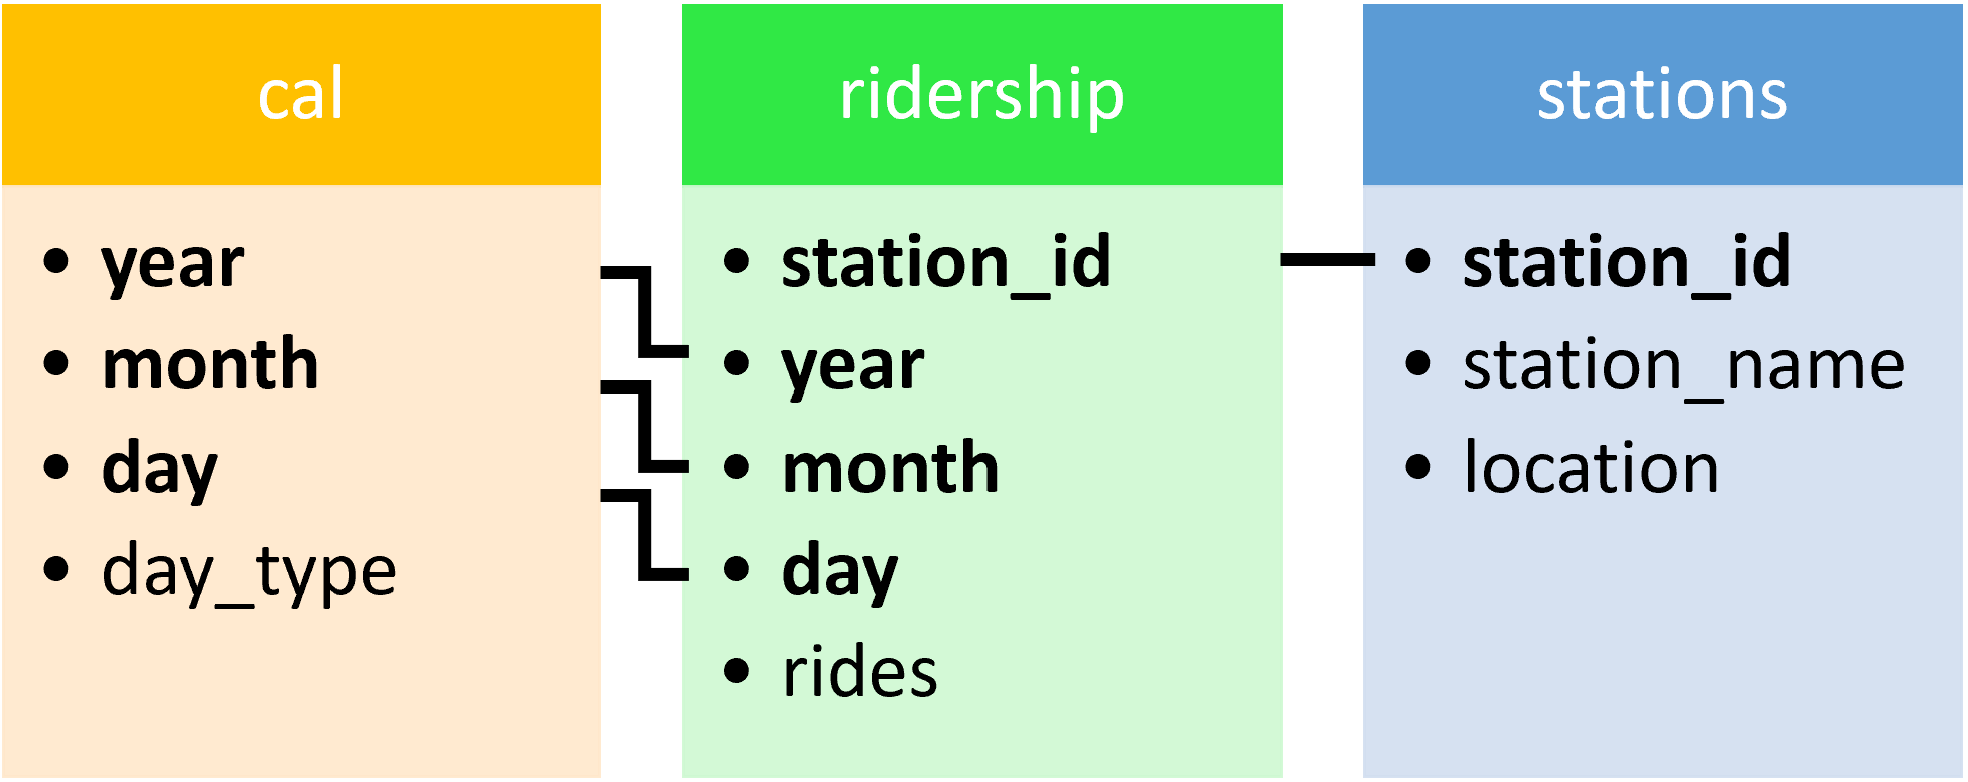

In [ ]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == "Weekday") 
                   & (ridership_cal_stations['station_name'] == "Wilson"))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

In [ ]:
# Merge the ridership, cal, and stations tables
ridership_cal_stations = ridership.merge(cal, on=['year','month','day']) \
							.merge(stations, on='station_id')

# Create a filter to filter ridership_cal_stations
filter_criteria = ((ridership_cal_stations['month'] == 7) 
                   & (ridership_cal_stations['day_type'] == "Weekday") 
                   & (ridership_cal_stations['station_name'] == "Wilson"))

# Use .loc and the filter to select for rides
print(ridership_cal_stations.loc[filter_criteria, 'rides'].sum())

# One to many merge with multiple tables

n this exercise, assume that you are looking to start a business in the city of Chicago. Your perfect idea is to start a company that uses goats to mow the lawn for other businesses. However, you have to choose a location in the city to put your goat farm. You need a location with a great deal of space and relatively few businesses and people around to avoid complaints about the smell. You will need to merge three tables to help you choose your location. The land_use table has info on the percentage of vacant land by city ward. The census table has population by ward, and the licenses table lists businesses by ward.

In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census,on="ward").merge(licenses,on="ward",suffixes=["_cen","_lic"])

In [ ]:
# Merge land_use and census and merge result with licenses including suffixes
land_cen_lic = land_use.merge(census, on='ward') \
                    .merge(licenses, on='ward', suffixes=('_cen','_lic'))

# Group by ward, pop_2010, and vacant, then count the # of accounts
pop_vac_lic = land_cen_lic.groupby(['ward','pop_2010','vacant'], 
                                   as_index=False).agg({'account':'count'})

# Sort pop_vac_lic and print the results
sorted_pop_vac_lic = pop_vac_lic.sort_values(['vacant','account','pop_2010'], 
                                             ascending=[0,1,1])

# Print the top few rows of sorted_pop_vac_lic
print(sorted_pop_vac_lic.head())